In [22]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Загрузка файла HR.csv в dataframe

In [5]:
HR = pd.read_csv('HR.csv')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Признаки:
- satisfaction_level​ - Уровень удовлетворенности работой
- Last_evaluation ​- Время с момента последней оценки в годах
- number_projects​ - Количество проектов, выполненных за время работы
- average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
- time_spend_company​ - Стаж работы в компании в годах
- work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
- left​ - уволился ли сотрудник8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
- department ​- отдел в котором работает сотрудник
- salary​ - относительный уровень зарплаты 

In [6]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Расчет основных статистик для переменных:

In [21]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 2. Расчет матрицы корреляции

In [142]:
print(pd.DataFrame(HR).corr())

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

## 3. Визуализация матрицы корреляции

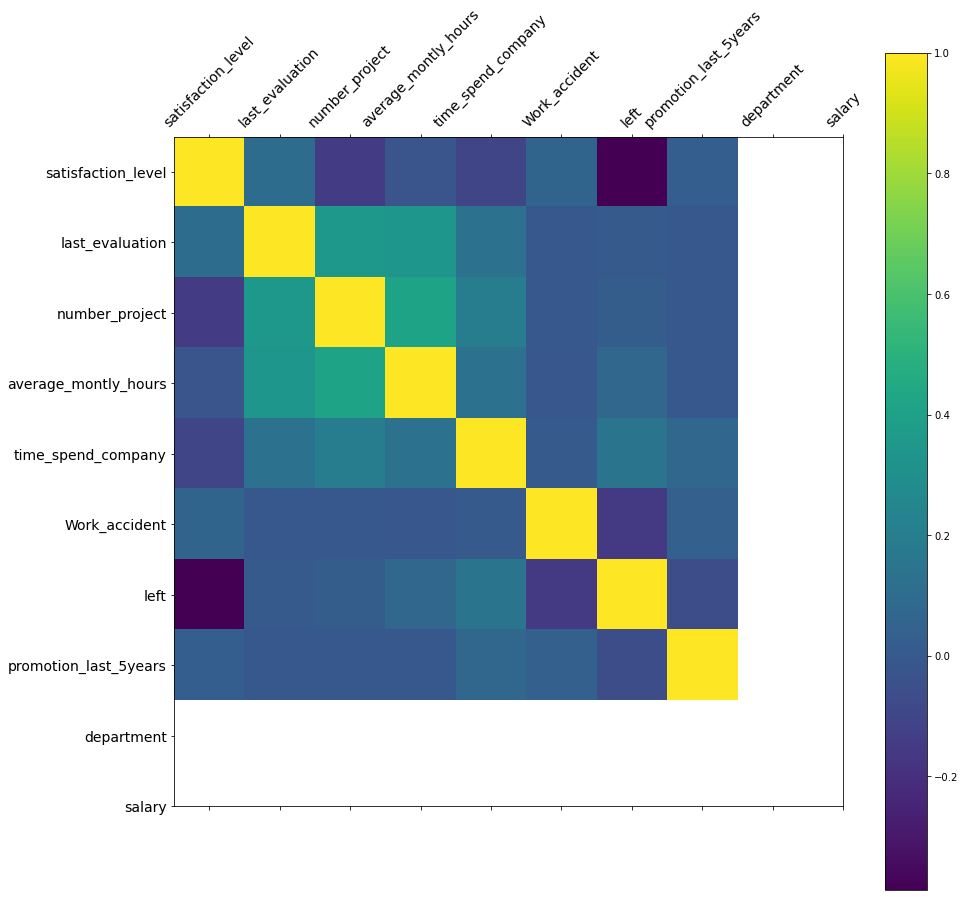

In [147]:
f = plt.figure(figsize=(15, 15))
plt.matshow(HR.corr(), fignum=f.number)
plt.xticks(range(HR.shape[1]), HR.columns, fontsize=14, rotation=45)
plt.yticks(range(HR.shape[1]), HR.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

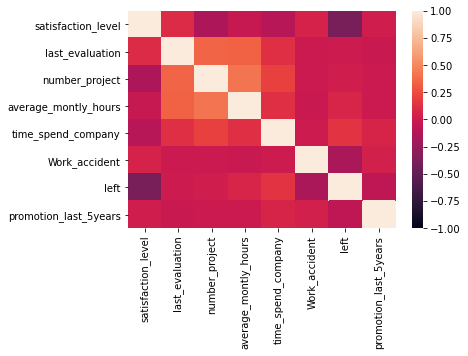

In [27]:
sns.heatmap(HR.corr(), vmin=-1, vmax=1)

## Наиболее скоррелированные между собой переменные:
- количество проектов (number_project) и среднее количество часов на рабочем месте в месяц (average_monthly_hours),
- время с момента последней оценки (last_evaluation) и количество проектов(number_project),
- уволился ли сотрудник (left) и уровень удовлетворенности работой (satisfaction_level); 

## наименее скоррелированные между собой переменные:
- уровень удовлетворенности работой (satisfaction_level) и среднее количество часов на рабочем месте в месяц (average_monthly_hours),
- среднее количество часов на рабочем месте в месяц (average_monthly_hours) и происходили ли несчастные случаи на рабочем месте с сотрудником (work_accident),
- повышался ли сотрудник за последние 5 лет (promotion_last_5years) и уволился ли сотрудник (left).

## Количество сотрудников, которые работают в каждом департаменте

In [149]:
HR1 = HR.loc[lambda HR: HR['left'] == 0] #Исключаем тех, кто ушел с работы
HR1.groupby('department').count()['left'].head(10)

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

In [66]:
#Распределение сотрудников по зарплатам
HR1.groupby('salary').count()['left'].head(10)

salary
high      1155
low       5144
medium    5129
Name: left, dtype: int64

# 5. Распределение сотрудников по зарплатам

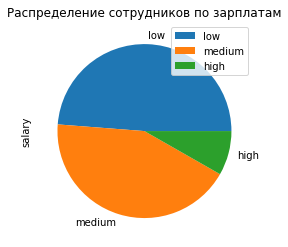

In [65]:
pie_data = HR.salary.value_counts().sort_values(ascending = False).head(10)
ax = pie_data.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам')
ax.legend()

# 6. Распределение сотрудников по зарплатам в каждом департаменте по отдельности

## IT

In [76]:
IT = HR.loc[HR['department'] == 'IT']
IT.groupby('salary').count()['left'].head(10)

salary
high       83
low       609
medium    535
Name: left, dtype: int64

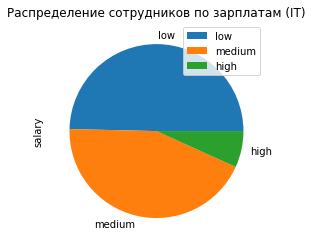

In [74]:
pie_IT = IT.salary.value_counts().sort_values(ascending = False).head(10)
ax1 = pie_IT.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (IT)')
ax1.legend()

## RandD

In [77]:
RandD = HR.loc[HR['department'] == 'RandD']
RandD.groupby('salary').count()['left'].head(10)

salary
high       51
low       364
medium    372
Name: left, dtype: int64

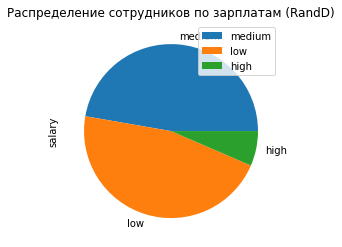

In [78]:
pie_RandD = RandD.salary.value_counts().sort_values(ascending = False).head(10)
ax2 = pie_RandD.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (RandD)')
ax2.legend()

## accounting

In [79]:
accounting = HR.loc[HR['department'] == 'accounting']
accounting.groupby('salary').count()['left'].head(10)

salary
high       74
low       358
medium    335
Name: left, dtype: int64

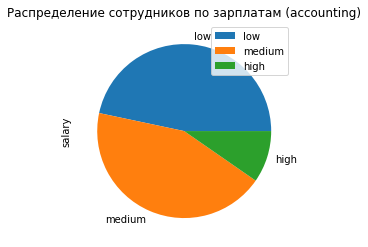

In [80]:
pie_accounting = accounting.salary.value_counts().sort_values(ascending = False).head(10)
ax3 = pie_accounting.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (accounting)')
ax3.legend()

## hr

In [79]:
hr = HR.loc[HR['department'] == 'hr']
hr.groupby('salary').count()['left'].head(10)

salary
high       74
low       358
medium    335
Name: left, dtype: int64

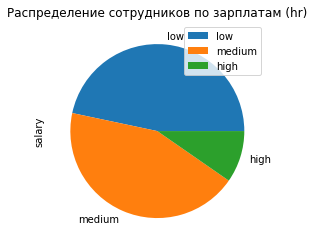

In [81]:
pie_hr = accounting.salary.value_counts().sort_values(ascending = False).head(10)
ax4 = pie_hr.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (hr)')
ax4.legend()

## management

In [83]:
management = HR.loc[HR['department'] == 'management']
management.groupby('salary').count()['left'].head(10)

salary
high      225
low       180
medium    225
Name: left, dtype: int64

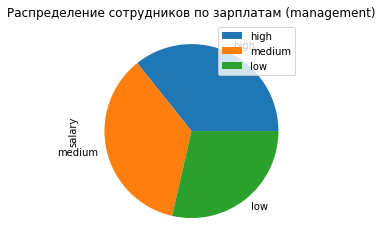

In [84]:
pie_management = management.salary.value_counts().sort_values(ascending = False).head(10)
ax4 = pie_management.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (management)')
ax4.legend()

## product_mng

In [85]:
product_mng = HR.loc[HR['department'] == 'product_mng']
product_mng.groupby('salary').count()['left'].head(10)

salary
high       68
low       451
medium    383
Name: left, dtype: int64

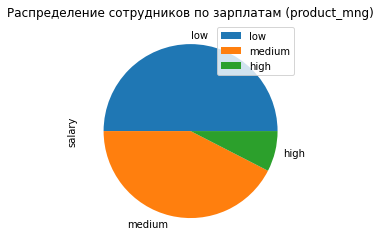

In [86]:
pie_product_mng = product_mng.salary.value_counts().sort_values(ascending = False).head(10)
ax5 = pie_product_mng.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (product_mng)')
ax5.legend()

## sales

In [88]:
sales = HR.loc[HR['department'] == 'sales']
sales.groupby('salary').count()['left'].head(10)

salary
high       269
low       2099
medium    1772
Name: left, dtype: int64

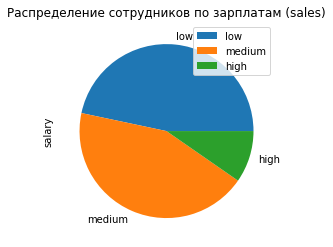

In [89]:
pie_sales = sales.salary.value_counts().sort_values(ascending = False).head(10)
ax6 = pie_accounting.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (sales)')
ax6.legend()

## support

In [91]:
support = HR.loc[HR['department'] == 'support']
support.groupby('salary').count()['left'].head(10)

salary
high       141
low       1146
medium     942
Name: left, dtype: int64

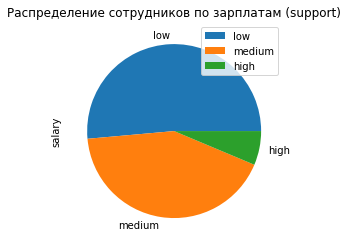

In [92]:
pie_support = support.salary.value_counts().sort_values(ascending = False).head(10)
ax7 = pie_support.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (support)')
ax7.legend()

## technical

In [93]:
technical = HR.loc[HR['department'] == 'technical']
technical.groupby('salary').count()['left'].head(10)

salary
high       201
low       1372
medium    1147
Name: left, dtype: int64

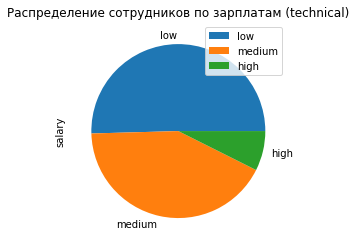

In [95]:
pie_technical = technical.salary.value_counts().sort_values(ascending = False).head(10)
ax8 = pie_technical.plot(kind='pie',
                   title='Распределение сотрудников по зарплатам (technical)')
ax8.legend()

## 8. Показатели уволившихся и не уволившихся сотрудников:

In [97]:
left = HR.loc[HR['left'] == 1]
n_left = HR.loc[HR['left'] == 0]

## Доля сотрудников с повышением за последние 5 лет:

In [99]:
left_w_promo = left.groupby('promotion_last_5years').count()['left']
left_w_promo

promotion_last_5years
0    3552
1      19
Name: left, dtype: int64

In [106]:
print('Доля сотрудников, получивших повышение за последние 5 лет, среди уволившихся:', round(19 / (3552 + 19) * 100, 2), '%')

Доля сотрудников, получивших повышение за последние 5 лет, среди уволившихся: 0.53 %


In [107]:
n_left_w_promo = n_left.groupby('promotion_last_5years').count()['left']
n_left_w_promo

promotion_last_5years
0    11128
1      300
Name: left, dtype: int64

In [108]:
print('Доля сотрудников, получивших повышение за последние 5 лет, среди оставшихся:', round(300 / (11128 + 300) * 100, 2), '%')

Доля сотрудников, получивших повышение за последние 5 лет, среди оставшихся: 2.63 %


## Средняя степень удовлетворенности:

In [137]:
print('Средняя степень удовлетворенности работой уволившихся сотрудников:',round(np.mean(left.satisfaction_level)*100, 1), '%')

Средняя степень удовлетворенности работой уволившихся сотрудников: 44.0 %


In [136]:
print('Средняя степень удовлетворенности работой оставшихся работать сотрудников:',round(np.mean(n_left.satisfaction_level)*100, 1), '%')

Средняя степень удовлетворенности работой оставшихся работать сотрудников: 66.7 %


## Среднее количество проектов:

In [139]:
print('Среднее количество проектов уволившихся сотрудников:',round(np.mean(left.number_project), 1))

Среднее количество проектов уволившихся сотрудников: 3.9


In [140]:
print('Среднее количество проектов оставшихся работать сотрудников:',round(np.mean(n_left.number_project), 1))

Среднее количество проектов оставшихся работать сотрудников: 3.8
